# Pose Overlay Video
This notebook demonstrates how to:
1. Download a badminton video
2. Extract frames
3. Analyze poses using MediaPipe
4. Visualize landmark motion

In [1]:
import sys
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Add the src folder to the system path
sys.path.append(os.path.abspath('../src'))

from download_video import download_video
from extract_frames import extract_frames
from analyze_pose import analyze_poses

I0000 00:00:1748966558.709182 2112967 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1


In [2]:
# 📥 Step 1: Download a YouTube Video
video_url = "https://www.youtube.com/watch?v=7ftCmsfzZ9A"  # Replace this
video_path = download_video(video_url)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1748966558.794390 2113074 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748966558.809780 2113073 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


[youtube] Extracting URL: https://www.youtube.com/watch?v=7ftCmsfzZ9A
[youtube] 7ftCmsfzZ9A: Downloading webpage
[youtube] 7ftCmsfzZ9A: Downloading tv client config
[youtube] 7ftCmsfzZ9A: Downloading tv player API JSON
[youtube] 7ftCmsfzZ9A: Downloading ios player API JSON
[youtube] 7ftCmsfzZ9A: Downloading m3u8 information
[info] 7ftCmsfzZ9A: Downloading 1 format(s): 18
[download] ../data/raw/【nice angle】Kunlavut Vitidsarn vs Lu Guang Zu -Sin.mp4 has already been downloaded
[download] 100% of   43.36MiB
✅ Video downloaded successfully.


In [3]:
# 🖼️ Step 2: Extract Frames
output_dir = '../data/output/frames'

# Only extract if no frames are found
if not os.path.exists(output_dir) or not glob.glob(os.path.join(output_dir, '*.jpg')):
    extract_frames(video_path, output_dir)
else:
    print(f"Frames already extracted in {output_dir}")

Frames already extracted in ../data/output/frames


In [4]:
# 🧍 Step 3: Analyze Pose
pose_csv_path = "../data/output/pose_data.csv"

if not os.path.exists(pose_csv_path):
    analyze_poses()
else:
    print(f"Pose data already exists at {pose_csv_path}")

Pose data already exists at ../data/output/pose_data.csv


In [5]:
# 📊 Step 4: Load and Inspect Pose Data
df = pd.read_csv("../data/output/pose_data.csv")
df.head()

,frame,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,...,z_29,x_30,y_30,z_30,x_31,y_31,z_31,x_32,y_32,z_32
0,frame_1000.jpg,0.508589,0.485752,0.080522,0.506666,0.478588,0.062521,0.505553,0.478765,0.062511,...,0.098316,0.520056,0.843684,0.093204,0.487922,0.820208,0.094782,0.520406,0.842089,0.080536
1,frame_1005.jpg,0.519309,0.491282,0.074163,0.517559,0.484771,0.060400,0.516170,0.484682,0.060405,...,0.068624,0.515435,0.784351,0.090023,0.492708,0.772362,0.067123,0.514972,0.775376,0.082823
2,frame_10085.jpg,0.515411,0.530203,0.176773,0.512713,0.524242,0.171983,0.510960,0.523990,0.171970,...,-0.001787,0.549786,0.822983,-0.043328,0.463561,0.819795,-0.015963,0.571992,0.817062,-0.055640
3,frame_10095.jpg,0.471109,0.569317,0.038742,0.469596,0.563886,0.026982,0.468801,0.564614,0.026958,...,-0.041996,0.570696,0.797338,-0.092966,0.467177,0.841951,-0.040078,0.574265,0.840384,-0.097353
4,frame_1010.jpg,0.521282,0.496063,0.102145,0.519414,0.488184,0.088258,0.517898,0.488085,0.088265,...,0.004612,0.521870,0.852918,0.041390,0.513655,0.870936,-0.002920,0.513781,0.867582,0.022435


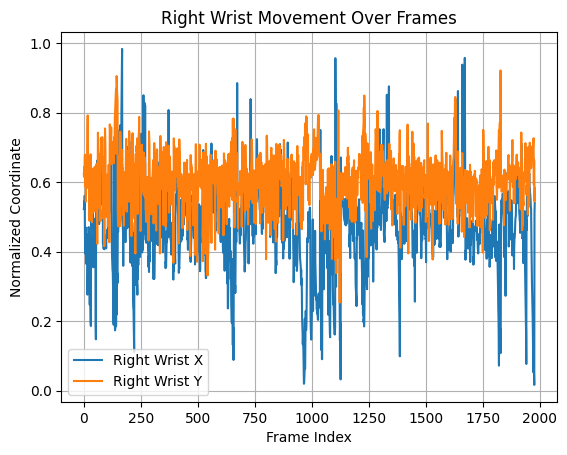

In [6]:
# 📈 Step 5: Visualize Right Wrist Movement
plt.plot(df["x_16"], label="Right Wrist X")
plt.plot(df["y_16"], label="Right Wrist Y")
plt.legend()
plt.title("Right Wrist Movement Over Frames")
plt.xlabel("Frame Index")
plt.ylabel("Normalized Coordinate")
plt.grid(True)
plt.show()

I0000 00:00:1748966562.028427 2112967 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1748966562.113263 2113159 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748966562.130078 2113160 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748966562.147292 2113158 landmark_projection_calculator.cc:186] Using NORM_RECT without IMAGE_DIMENSIONS is only supported for the square ROI. Provide IMAGE_DIMENSIONS or use PROJECTION_MATRIX.


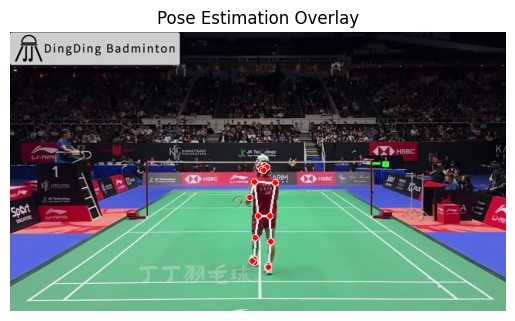

In [7]:
# ✅ Optional: Pose Overlay on One Frame
import cv2
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

frame_path = "../data/output/frames/frame_1000.jpg"  # Adjust frame number
img = cv2.imread(frame_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

pose = mp_pose.Pose(static_image_mode=True)
results = pose.process(img_rgb)

if results.pose_landmarks:
    mp_drawing.draw_landmarks(img, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("Pose Estimation Overlay")
    plt.show()
else:
    print("No pose detected.")

In [ ]:
# Pose Overlay Video ✅ Option 2: OpenCV Window (Real-time Playback, Local Only)

cap = cv2.VideoCapture(video_path)
pose = mp.solutions.pose.Pose()
mp_drawing = mp.solutions.drawing_utils

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = pose.process(rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(frame, results.pose_landmarks, mp.solutions.pose.POSE_CONNECTIONS)

    cv2.imshow("Pose Detection", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

I0000 00:00:1748966562.223865 2112967 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M1
W0000 00:00:1748966562.311143 2113188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1748966562.331050 2113188 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


: 